<a href="https://colab.research.google.com/github/Lerianda/Data_Science/blob/master/%D0%A0%D1%8B%D0%BC%D0%B0%D1%80%D1%8C%D0%92%D0%92_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_29_05_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рымарь Валерия Всеволодовна 
Первый опыт в сфере Data Science 

Источник: [Industrial production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)

Методы:
1. **Чтение данных** *(Применимо, так как даные в подходящем формате)*
2. **Перевод строки в дату** *(Неприменимо, информация о дате изначально в нужном формате)*
3. **Сортировка по дате** *(Неприменимо, данные изначально расположены в нужном порядке)*
4. **Минимальное и максимальное потребление** *(Применимо, например для расчета максимальной нагрузки)*
5. **Скользящее среднее** *(Применимо, как ко всему промежутку времи, так и к отфильтрованным по различным признакам (месяц, последние 10 лет) данным)* 
6. **Сортировка** *(Применимо и очень полезно)*
7. **Квантиль за промежуток времени, постоянное значение** *(Неприменимо ко всему промежутку, так как значения 40 остались  далеком прошлом и вероятность получить их сейчас пренебрежимо мала, но применима к отфильтованным данным, у которых скользящее среднее близко к горизонтальной прямой)*
8. **Скользящий квантиль** *(Применимо)*
9. **Гистограмма** *(Применимо, для подтверждения роста значений промежутка времени относительно всего периода)*
10. **Корреляция** *(Неприменимо, так как у нас всего 1 столбец параметров, который сам с собой дает коррекцию = 1)*
11. **Автокорреляция и сезонность** *(Неприменимо ко всему промежутку, так как нету сезонности (см. источник "Not Seasonally Adjusted"), но применимо к отфильтрованным данным,например за последние 10 лет)*
12. **Тренд** *(Применимо. Для всего промежутка на этих данных дает видимую погрешность предсказания. На отфильтрованных данных хорошо применим)*





---


*   Чтение данных и преобразование к удобному для работы формату


---



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
# импортируем библиотеки

In [0]:
data1 = pd.read_excel('https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true', skiprows=0)
data = pd.read_excel('https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true', skiprows=10)
# data1 - таблица со всеми начальными строками
# data - таблица с пропущенными строками (10) для дальнейшей корректной работы с данными дальше

In [3]:
data
# выведем таблицу, чтобы проверить

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


In [4]:
data.columns
# названия колонок вывелись верные, значит мы пропустили нужное число строк таблицы

Index(['observation_date', 'IPG2211A2N'], dtype='object')

In [5]:
data.dtypes
# Так как время измерения изначально в формате даты, то переводить его нет необходимости, функцию pd.to_datetime() можно не использовать

observation_date    datetime64[ns]
IPG2211A2N                 float64
dtype: object

In [6]:
data.index = data['observation_date']
data
# В качестве индексов присвоили дату измерения  

,observation_date,IPG2211A2N
observation_date,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133
...,...,...
2019-08-01,2019-08-01,111.2697
2019-09-01,2019-09-01,102.0033
2019-10-01,2019-10-01,93.9993


In [0]:
# Так как данные расположены в нужном порядке (отсортированы по дате)
# то нам не надо проводить дополнительную сортировку

Text(0.5, 1.0, 'Производство газа и электроэнегии от даты')

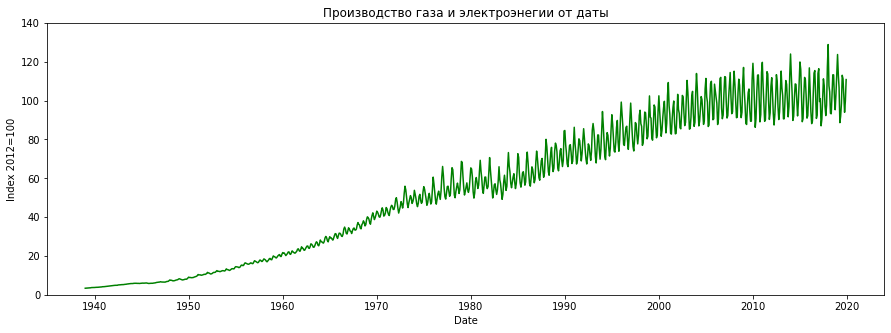

In [8]:
plt.figure(figsize=(15,5))
plt.plot(data.index, data['IPG2211A2N'], 'g')

plt.ylabel('Index 2012=100')
plt.xlabel('Date')
plt.ylim(0,140)
plt.title('Производство газа и электроэнегии от даты')
# График совпадает с выложенным на сайте источника
# Добавлены подписи к осям, проставлены предели по оси y и изменен цвет для большей наглядности и изучения новых функций



---


*  Получение статистики


---



In [9]:
data.describe()
# Выведем статистику, включая минимальное и максимальное потребление
# Максимальное потребление = 128.9
# Минимальное значение = 3.4

,IPG2211A2N
count,972.000000
mean,54.801967
std,35.497633
min,3.384200
25%,19.581700
50%,55.023450
75%,87.855800
max,128.907100




---


*  Анализ применимости квантилей с помощью скользящего среднего
*  Сортировка


---



Text(0.5, 1.0, 'Производство газа и электроэнегии и динамика среднего производства от даты')

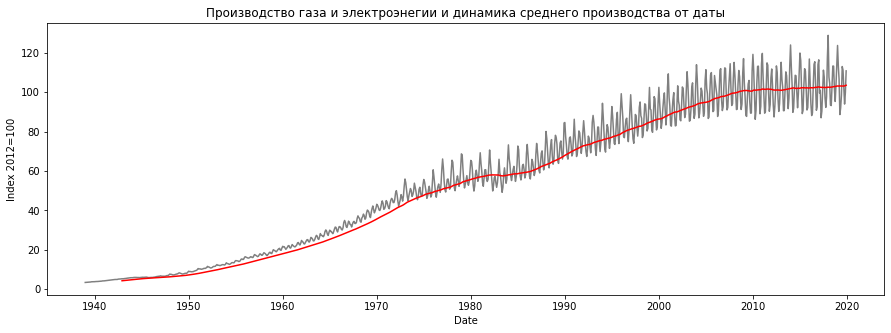

In [10]:
plt.figure(figsize=(15,5))
plt.plot(data.index, data['IPG2211A2N'], color='gray')

plt.plot(data.index, data['IPG2211A2N'].rolling(48).mean(), 'r')

plt.ylabel('Index 2012=100')
plt.xlabel('Date')
plt.title('Производство газа и электроэнегии и динамика среднего производства от даты')

# Делаем округление по 4 годам (48 месяцев), чтобы уменьшить колебания скользящего среднего
# В последние 10 лет потребление за 4 года остается почти неизменным, исследуем этот промежуток отдельно

# Так как наблюдается стабильный рост, без выраженной периодичности на всем промежутке, 
# то квантили за период (=const) неприменимы (сейчас добиться зимой всеобщего потребления газа и электроэнергии меньше 40 звучит нереально)

Наблюдается стабильное увеличение производства электроэнергии и газа

Text(0.5, 1.0, 'Производство газа и электроэнегии и динамика квантиля от даты')

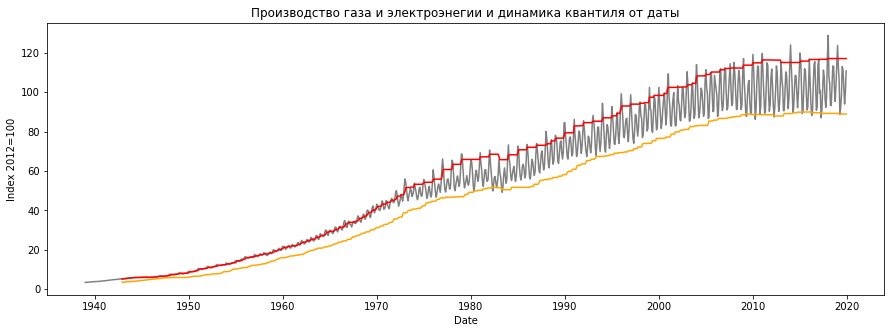

In [11]:
# Исследуем данные с помощью динамических квантилей (скользящих)
quant95 = data['IPG2211A2N'].rolling(48).quantile(0.95)
quant05 = data['IPG2211A2N'].rolling(48).quantile(0.05)
plt.figure(figsize=(15,5))
plt.plot(data.index, data['IPG2211A2N'], color='gray')

plt.plot(data.index, quant95, 'r')

plt.plot(data.index, quant05, 'orange')

plt.ylabel('Index 2012=100')
plt.xlabel('Date')
plt.title('Производство газа и электроэнегии и динамика квантиля от даты')

Прогнозируемое производство газа и электроэнергии с вероятностью 90% попадает в диапазон между красной и оранжевой линией (95% квантиль и 5% квантиль)

С годами растет разница между максимальным и минимальным производством газа и электроэнергии (Растет расстояние между квантилями)

In [12]:
# Попробуем обработать данные за последние 10 лет 
# Предполагаем на этом промежутке наличие сезонности
data_last = data[data['observation_date'].dt.year >= 2010]
data_last

,observation_date,IPG2211A2N
observation_date,,
2010-01-01,2010-01-01,119.2473
2010-02-01,2010-02-01,110.7525
2010-03-01,2010-03-01,98.3430
2010-04-01,2010-04-01,86.2612
2010-05-01,2010-05-01,90.8459
...,...,...
2019-08-01,2019-08-01,111.2697
2019-09-01,2019-09-01,102.0033
2019-10-01,2019-10-01,93.9993


Text(0.5, 1.0, 'Производство газа и электроэнергии за последние 10 лет с динамикой среднего за 3 года')

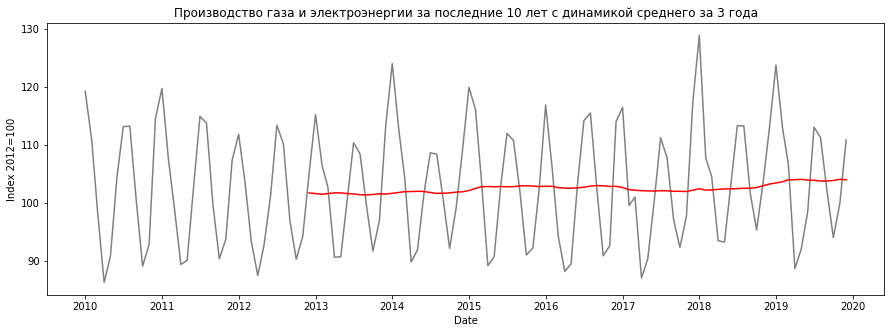

In [13]:
plt.figure(figsize=(15,5))
plt.plot(data_last.index, data_last['IPG2211A2N'], color='gray')

plt.plot(data_last.index, data_last['IPG2211A2N'].rolling(36).mean(), 'r')

plt.ylabel('Index 2012=100')
plt.xlabel('Date')
plt.title('Производство газа и электроэнергии за последние 10 лет с динамикой среднего за 3 года')
# Скользящее среднее за 3 года практически прямая линия, значит можно использовать квантили без динамики, за весь промежуток

In [0]:
# Узнаем наиболее вероятную нагрузку на произодство газа и электроэнергии ха последние 10 лет
# С вероятностью 90% произодство окажется между квантилями в 95% и 5%
N = len(data_last) # количество записей
# Список длины N со скопированным значением квантиля за 10 лет - размножили список из 1 элемента N раз
quant_95 = [data_last['IPG2211A2N'].quantile(0.95)]*N
quant_05 = [data_last['IPG2211A2N'].quantile(0.05)]*N

In [15]:
# "95% Квантиль = 117.34 производство": с вероятность 95% значение не превысит число 117.34
# "5% Квантиль = 89.15 произодство": с вероятность 95% значение превысит число 89.15
print(data_last['IPG2211A2N'].quantile(0.05),'-', data_last['IPG2211A2N'].quantile(0.95))

89.149945 - 117.33818


Мы получили диапазон прогнозирования на основе последних 10 лет, в который с вероятностью 90% попадут новые значения

Text(0.5, 1.0, 'Произодство газа и электроэнергии за 10 лет с квантилями 95 и 5% за период')

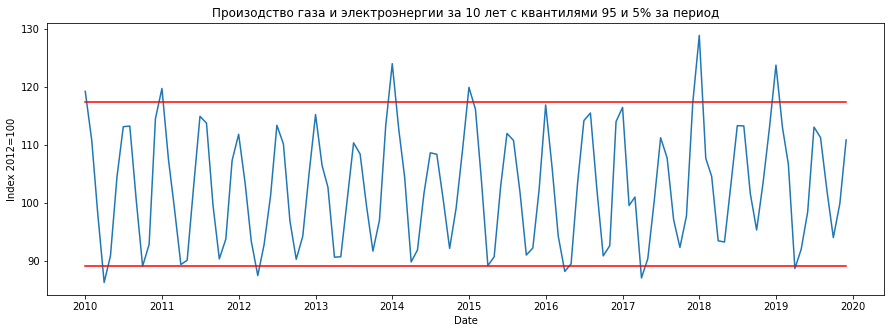

In [16]:
plt.figure(figsize=(15,5))
plt.plot(data_last.index, data_last['IPG2211A2N'])
plt.plot(data_last.index, quant_95,'r')
plt.plot(data_last.index, quant_05,'r')

plt.ylabel('Index 2012=100')
plt.xlabel('Date')
plt.title('Произодство газа и электроэнергии за 10 лет с квантилями 95 и 5% за период')

Сильно выбиваются по произодству зимы 2014,2018 и 2019 годов, значит в эти зимы было холоднее обычного

Видны пики производства летом. Возможные причины:капитальный ремонт угольных электростанций и запуск сезонного производства (например консервация фруктов). Для изучения требуется дополнительная информация.



---


* Гистограмма и корреляция


---



Text(0.5, 1.0, 'Гистограмма произодства газа и электроэнергии за весь период')

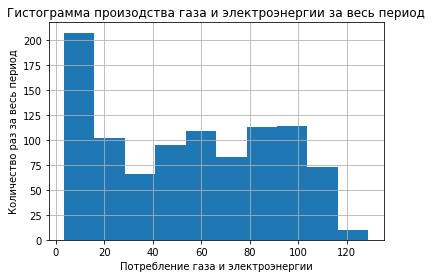

In [17]:
# За весь период
data['IPG2211A2N'].hist() 
plt.ylabel('Количество раз за весь период')
plt.xlabel('Потребление газа и электроэнергии')
plt.title('Гистограмма произодства газа и электроэнергии за весь период')

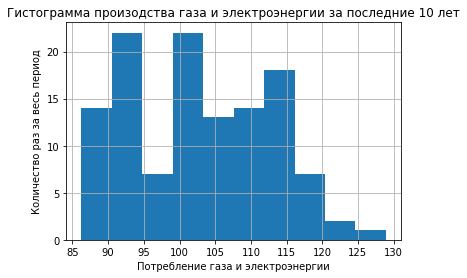

In [18]:
# За последние 10 лет
data_last['IPG2211A2N'].hist() 
plt.ylabel('Количество раз за весь период')
plt.xlabel('Потребление газа и электроэнергии')
plt.title('Гистограмма произодства газа и электроэнергии за последние 10 лет')
plt.locator_params(axis='x', nbins=15)

Потребление газа и электроэнергии за последние 10 лет возрасло по сравнению с данными за весь период и не опускалось ниже 85.

In [19]:
# У нас 1 столбец и индекс. Неприменимо.   
data.corr()  

,IPG2211A2N
IPG2211A2N,1.0


Корреляция параметров не применима к этим данным, так как у нас присутствует только один параметр, произодство. 



---


*  Анализ применимости автокорреляции

---




Text(0.5, 1.0, 'Автокорреляция потребления за последние 10 лет')

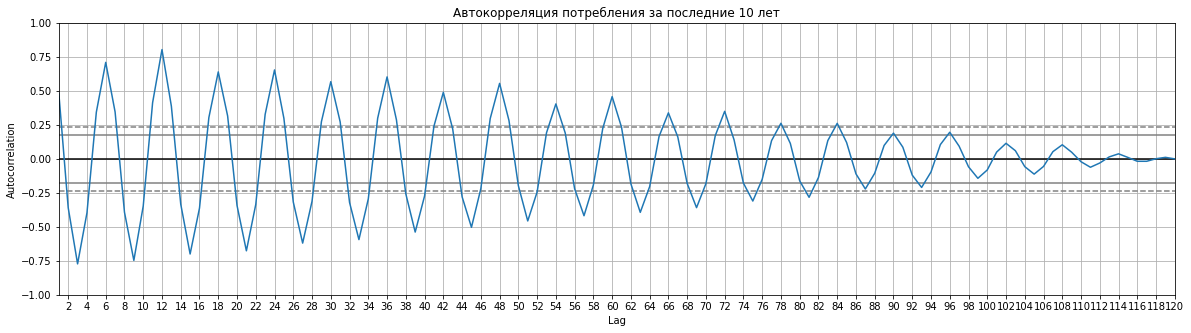

In [20]:
# График автокорреляции: график, который показывает величину корреляции в зависимости от смещения (Lag)
# Так как на самом сайте применимо к графику дано, что "Not Seasonally Adjusted", то автокорреляция ко всему графику неприменима
# Попробуем проверить наличие сезонности за последние 10 лет, когда скользящее среднее аппроксимируется горизонтальной линией 
plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(data_last['IPG2211A2N'])
plt.locator_params(axis='x', nbins=80)
plt.title('Автокорреляция потребления за последние 10 лет')
# Из графика видно, что график максимально "похож" сам на себя при сдвиге равном ~12 => цикл ~12 месяцев
# Автокорреляция дает значение > 0.75 при 12 месяцах
# Последнее десятилетие существуят явно выраженная сезонность
# Дополнительная, более слабая сезонность существует при сдвиге на 6 измерений (6 месяцев). 
# Требует более детального исследования, так как наличие устойчивых пиков потребления энергии летом (пусть и более слабых, нежели в зимние месяцы)
# Влияет на работу компаний, обеспечивающих население газом и электроэнергией

Сезонность за весь период отсутствует (см. источник).

За последние 10 лет есть сезонность: 

Сильная (autocorrelation>0.75), 12 месяцев (соответствует году)

Слабая (autocorrelation< 0.75), 6 месяцев (полгода, вторичные пики приходятся на лето, необходимо уточнение цели потребления для логических выкладок, возможные причины: капитальный ремонт угольных электростанций и запуск сезонного производсва)




---


*  Нахождение месяца максимального производства газа и электроэнергии с помощью скользящего среднего

---



In [0]:
# Попробуем узнать в каком месяце максимальное производство 
# (Данные месяцы были выбраны после проверки пиков по графику на сайте источника и полученных в процессе анализа графиков и данных)
data_dec = data[data['observation_date'].dt.month == 12]  
# отфильтровали только записи, сделанные в декабре (Предположительно самое большое производство газа и электричества)
data_jan = data[data['observation_date'].dt.month == 1]  
# отфильтровали только записи, сделанные в январе (Предположительно самое большое производство газа и электричества)
data_feb = data[data['observation_date'].dt.month == 2]  
# отфильтровали только записи, сделанные в феврале (Предположительно самое большое производство газа и электричества)
data_jul = data[data['observation_date'].dt.month == 7]  
# отфильтровали только записи, сделанные в январе (Предположительно самое большое производство газа и электричества)
data_aug = data[data['observation_date'].dt.month == 8]  
# отфильтровали только записи, сделанные в феврале (Предположительно самое большое производство газа и электричества)

(0.0, 140.0)

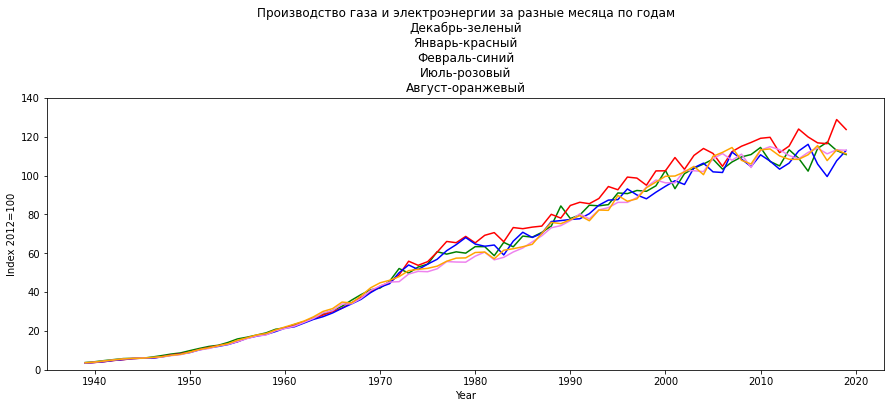

In [22]:
plt.figure(figsize=(15,5))
plt.plot(data_jan.index, data_dec['IPG2211A2N'], 'g')
plt.plot(data_jan.index, data_jan['IPG2211A2N'], 'r')
plt.plot(data_jan.index, data_feb['IPG2211A2N'], 'b')
plt.plot(data_jan.index, data_jul['IPG2211A2N'], 'violet')
plt.plot(data_jan.index, data_aug['IPG2211A2N'], 'orange')

plt.ylabel('Index 2012=100')
plt.xlabel('Year')
plt.title('Производство газа и электроэнергии за разные месяца по годам\nДекабрь-зеленый\nЯнварь-красный\nФевраль-синий\nИюль-розовый\nАвгуст-оранжевый')
plt.ylim(0,140)
# 

(0.0, 140.0)

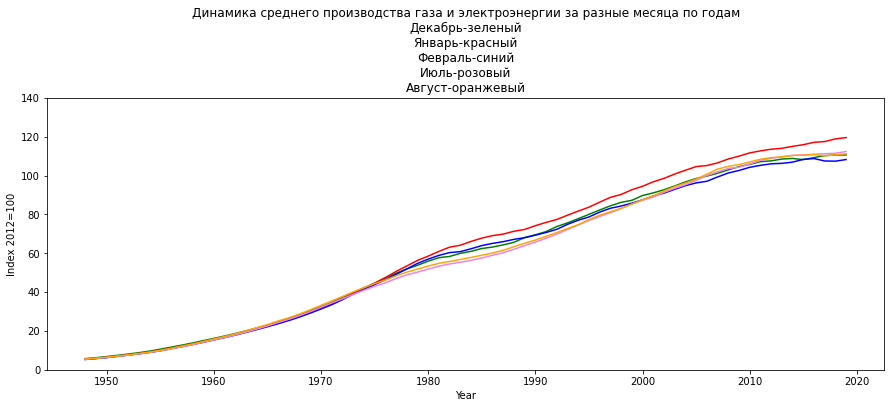

In [23]:
plt.figure(figsize=(15,5))

plt.plot(data_jan.index, data_dec['IPG2211A2N'].rolling(10).mean(), 'g')
plt.plot(data_jan.index, data_jan['IPG2211A2N'].rolling(10).mean(), 'r')
plt.plot(data_jan.index, data_feb['IPG2211A2N'].rolling(10).mean(), 'b')
plt.plot(data_jan.index, data_jul['IPG2211A2N'].rolling(10).mean(), 'violet')
plt.plot(data_jan.index, data_aug['IPG2211A2N'].rolling(10).mean(), 'orange')

plt.ylabel('Index 2012=100')
plt.xlabel('Year')
plt.title('Динамика среднего производства газа и электроэнергии за разные месяца по годам\nДекабрь-зеленый\nЯнварь-красный\nФевраль-синий\nИюль-розовый\nАвгуст-оранжевый')
plt.ylim(0,140)

# Из графика видно, что красная кривая скользящего среднего, соответствующая январю, расположена выше, нежели остальные две
# Вывод: в январе в среднем наибольшее потребление электроэнергии и газа
# Это соответствует логике, средний месяц зимы, затраты на отопление возрастают

В среднем потребление за январь больше потребления за другие месяцы (самый холодный месяц, большие затраты на отопление)

В 1980-1990 среднее производство газа и электроэнергии в летние месяцы было меньше, чем в зимние. Последние 10 лет производство газа и электроэнергии стало, чем потребление в такие зимние месяцы как февраль и декабрь. Значит появилось больше целей потребления газа и электроэнергии по сравнению с 1980-1990 в летние месяцы.



---


*  Анализ применимости линейной регрессии


> 1.   Для всего промежутка времени *(Неприменимо, дает видимое отклонение прогнозируемых данных)*
2.   Для последних 10 лет *(Применимо)*

---



* Проверка для всего промежутка

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor = LinearRegression()  
# модель регрессии - проводим прямую с помщью МНК (метода наименьших квадратов расстояний от экспериментальных точек до аппроксимирующей прямой)

In [26]:
# Диапазон для всего промежутка времени слабо применим, проверим
x_range = list(range(len(data)))
X = pd.DataFrame(x_range)  
# Таблица с номерами строк (регрессор требует данные в формате таблица + столбец итоговых значений)
X

,0
0,0
1,1
2,2
3,3
4,4
...,...
967,967
968,968
969,969
970,970


In [27]:
regressor.fit(X, data['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
result = regressor.predict(X)

Text(0.5, 1.0, 'Тренд производства газа и электроэнергии за весь период')

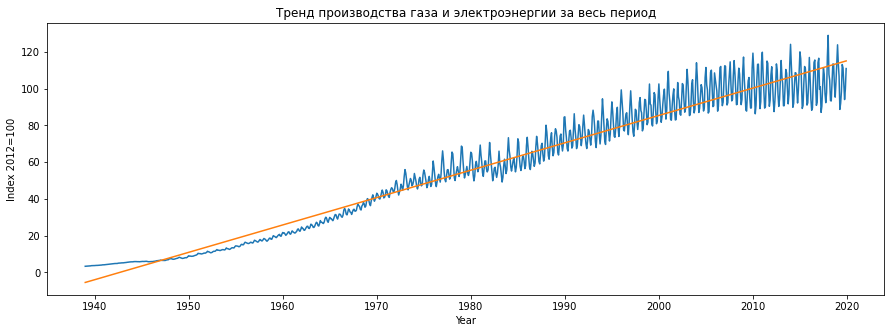

In [29]:
plt.figure(figsize=(15,5))
plt.plot(data.index, data['IPG2211A2N'])  # нужна общая шкала для 2 графиков =>индекс используется 1 в обоих случаях
plt.plot(data.index, result)

plt.ylabel('Index 2012=100')
plt.xlabel('Year')
plt.title('Тренд производства газа и электроэнергии за весь период')
# Очевидно, что модель линейной регрессии на всем промежутке плохо аппроксимирует данные, 
# предсказать по ней потребление за следующий год невозможно, оно будет слишком большим

Для всего промежутка линия тренда дает неккоректный прогноз на следующий год и далее, а значит неприменимо.

Общая тенденция- производство возрастает со временем.

* Тренд за последние 10 лет

In [0]:
regressor1 = LinearRegression()

In [31]:
# Диапазон для последних 10 лет
x1_range = list(range(len(data_last)))
X1 = pd.DataFrame(x1_range)  
# Таблица с номерами строк (регрессор требует данные в формате таблица + столбец итоговых значений)
X1

,0
0,0
1,1
2,2
3,3
4,4
...,...
115,115
116,116
117,117
118,118


In [32]:
regressor1.fit(X1, data_last['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
result1 = regressor1.predict(X1)

Text(0.5, 1.0, 'Тренд производства за последние 10 лет')

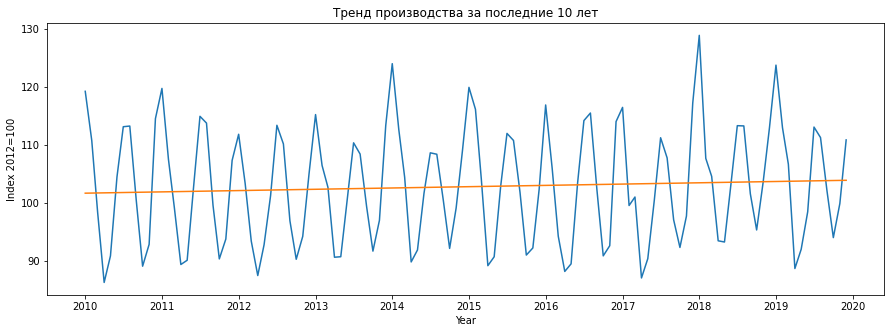

In [34]:
plt.figure(figsize=(15,5))
plt.plot(data_last.index, data_last['IPG2211A2N'])  
plt.plot(data_last.index, result1)

plt.ylabel('Index 2012=100')
plt.xlabel('Year')
plt.title('Тренд производства за последние 10 лет')
# Из графика видно, что потребление газа и электроэнергии понемногу растет
# Это логично, так как прирост населения в США составляет 0,75%, а значит увеличивается и потребление
# Сделать топ строчку с корреляцие прироста и тренда

Прирост производства газа и электроэнерии слабый, соотносим с приростом населения в стране сбора данных (США), примерно 0,75%-1,5%. 



---
Как мы видим, производство газа и электроэнергии растет и при этом увеличивается разница между минимальным и максимальным значением производства. Мы можем прогнозировать в горизонте нескольких лет пики производства с большой вероятностью
